# EDA + baselines starter

In [115]:
import numpy as np

## 1. EDA

In [114]:
import pandas as pd

In [9]:
train_df = pd.read_csv('./data/train.csv')

In [12]:
train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize      ...        Health  Quantity  Fee  State  \
0             1      ...             1         1  100  41326   
1             2      ...             1         1    0  41401   
2             2      ...             1         1    0  41326   
3             2      ...             1         1  150  41401   
4             2      ...             1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [14]:
train_df.columns.tolist()

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed']

In [15]:
train_df.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [16]:
train_df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

## 2. Baselines

In [120]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [133]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [134]:
np.random.seed(0)

In [135]:
X = train_df.select_dtypes(exclude='object').values[:, :-1]
y = train_df.select_dtypes(exclude='object').values[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [264]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=12, min_samples_split=12, min_samples_leaf=2,
                           max_features=0.4, max_leaf_nodes=500)

In [265]:
cross_val_score(rf, X_train, y_train, scoring=make_scorer(rmse), cv=5).mean()

1.070406969819545

In [271]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=0.4, max_leaf_nodes=500, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [279]:
def get_importances_dict(model):
    importances_dict = dict(zip(train_df.select_dtypes(exclude='object').columns, model.feature_importances_))
    new_dict = {col: 0 for col in train_df.columns}
    for key, value in importances_dict.items():
        new_dict[key] += value
    new_dict = dict(sorted(new_dict.items(), key=lambda x: x[1], reverse=True))
    return new_dict

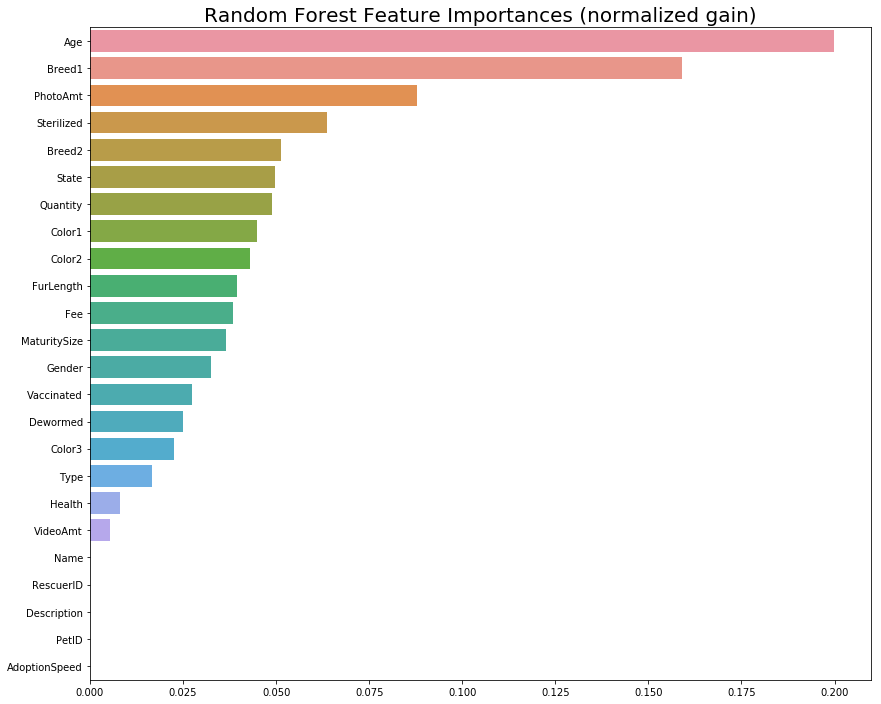

In [280]:
importances_dict = get_importances_dict(rf)
plt.figure(figsize=(14, 12))
sns.barplot(x=list(importances_dict.values()), y=list(importances_dict.keys()))
plt.title('Random Forest Feature Importances (normalized gain)', fontsize=20)
plt.show()

In [ ]:
dict.update()